In [63]:
import os
import mxnet as mx
import numpy as np
import copy
import re
import json
import cv2 as cv
import scipy
import PIL.Image
import math
import time
import scipy
import matplotlib
%matplotlib inline
import pylab as plt
from scipy.ndimage.filters import gaussian_filter
from generateLabelCPM import *
from collections import namedtuple

Point = namedtuple('Point', 'x y')
crop_size_x = 368
crop_size_y = 368
center_perterb_max = 40
scale_prob = 1
scale_min = 0.5
scale_max = 1.1
target_dist = 0.6


## Load keypoint data

In [64]:
with open('pose_io/data.json', 'r') as f:
    datas = json.load(f)
keyss = datas.keys()

In [65]:
len(keyss)

94936

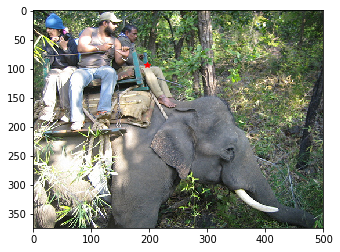

In [157]:
imgsequence = 13 ## image number
cimage = cv.imread(datas[keyss[imgsequence]]['img_paths'])
plt.imshow(cimage[:, :, [2, 1, 0]])
plt.plot(datas[keyss[imgsequence]]['objpos'][0], datas[keyss[imgsequence]]['objpos'][1], 'r*')

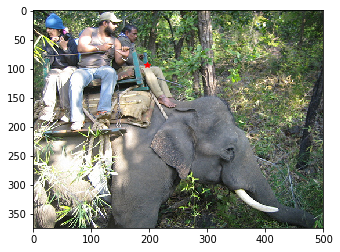

In [164]:
imgsequence = 13 ## image number
cimage = cv.imread(datas[keyss[imgsequence]]['img_paths'])
plt.imshow(cimage[:, :, [2, 1, 0]])
plt.plot(datas[keyss[imgsequence]]['objpos'][0], datas[keyss[imgsequence]]['objpos'][1], 'r*')

## Generate heatmap, pagmap and mask

In [165]:
image, mask, heatmap, pagmap = getImageandLabel(datas[keyss[imgsequence]])

In [166]:
# (5, 6)
# (28, 29)
# (31, 32)
# (35, 36)
# (43, 44)

## Show heatmap

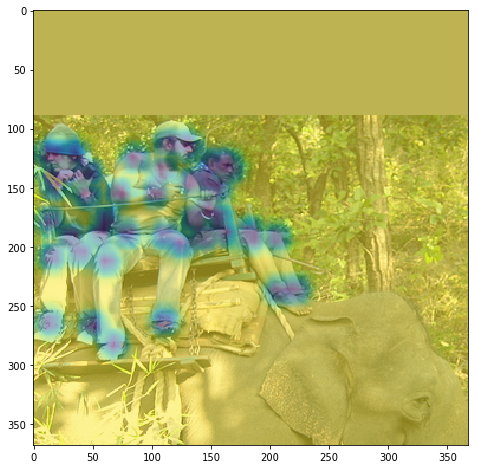

In [167]:
# part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, 
#             Lank, Leye, Reye, Lear, Rear, pt19]
heatmapScale = cv.resize(heatmap[18], (0, 0), fx=8, fy=8)

f = plt.figure(1)
plt.imshow(image[:,:,[2,1,0]])
ax2 = plt.imshow(heatmapScale, alpha=.5)
f.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

## Show part affinity graph

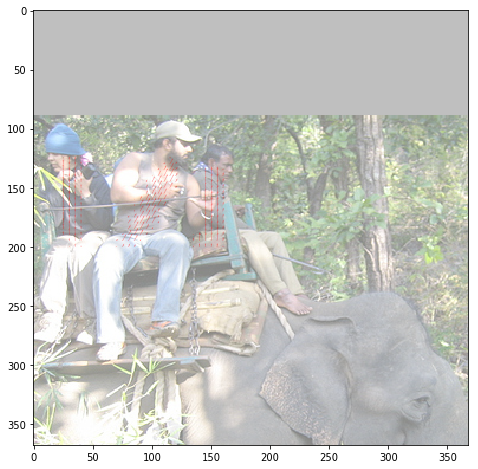

In [168]:
from numpy import ma

pagmapScale0 = cv.resize(pagmap[0], (0, 0), fx=8, fy=8)
pagmapScale1 = cv.resize(pagmap[1], (0, 0), fx=8, fy=8)
U = pagmapScale0 * -1
V = pagmapScale1
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.1*0.1] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

plt.figure()
plt.imshow(image[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

## Show mask

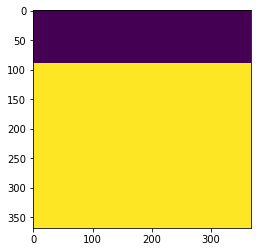

In [169]:
f = plt.figure(1)
plt.imshow(mask[:,:,0])
f.show()